In [3]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import quantities as pq
import seaborn as sns
from tools_plot import plot_psth, fix_figure, savefig, despine, set_style
import neo
import copy
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
dataa = np.load('results/triple.npz')['data'][()]

In [5]:
set_style('article')
t_stop = dataa['status']['time']
spiketrains = [s['times'] for s in dataa['spiketrains']]
names = ['A', 'B', 'C']
colors = sns.color_palette()

In [18]:
set_style('article', w=.4)
N_trials = 1000
xlim = [-10, 30] * pq.ms

In [16]:
t_stop = dataa['status']['time']
spiketrains_neo = [neo.SpikeTrain(times=np.array(sptr['times'])*pq.ms, 
                              t_start=0*pq.ms, t_stop=t_stop*pq.ms, name=sptr['name'])
               for sptr in dataa['spiketrains']]
epoch = neo.Epoch(times=dataa['epoch']['times'][:N_trials] * pq.ms, 
                  durations=dataa['epoch']['durations'][:N_trials] * pq.ms)

/home/mikkel/.virtualenvs/main/lib/python3.5/site-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


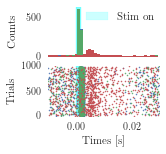

In [19]:
fig, axs = plt.subplots(2,1, sharex=True)
for n, sptr in enumerate(spiketrains_neo):
    plot_psth(spike_train=sptr, epoch=epoch, xlim=xlim, axs=axs, hist_binsize=1*pq.ms,
              color=colors[n], stim_color='cyan', hist_alpha=1., hist_edgecolor=None, 
              hist_ylabel='Counts', rast_size=1);
sns.despine(bottom=True, left=True)
fig = plt.gcf()
ax_t = fig.axes[-1]
ax_t.set_yticks([0, 500, 1000])
fig.align_labels()
savefig(fig, 'raster', bbox_inches='tight')